In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import brier_score_loss
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB

In [3]:
class_1 = 500
class_2 = 500 #两个类别分别设定500个样本
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [0.5, 0.5] #设定两个类别的方差

In [4]:
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y
                                               ,test_size=0.3
                                               ,random_state=420)

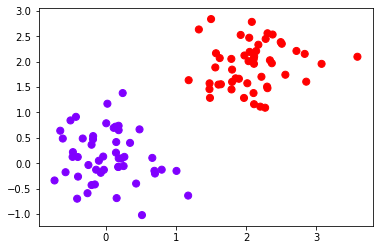

In [5]:
plt.scatter(X[:,0][450:550],X[:,1][450:550],c=y[450:550],s=50,cmap="rainbow")
plt.show()

In [6]:
#先归一化，保证输入多项式朴素贝叶斯的特征矩阵中不带有负数
mms = MinMaxScaler().fit(Xtrain)
Xtrain_ = mms.transform(Xtrain)
Xtest_ = mms.transform(Xtest)

In [8]:
#不设置二值化
bnl_ = BernoulliNB().fit(Xtrain_,Ytrain)
bnl_.score(Xtest_,Ytest)
brier_score_loss(Ytest,bnl_.predict_proba(Xtest_)[:,1],pos_label=1)

0.25000009482193225

In [9]:
#设置二值化为0.5
bnl = BernoulliNB(binarize=0.5).fit(Xtrain_, Ytrain)
bnl.score(Xtest_,Ytest)
brier_score_loss(Ytest,bnl.predict_proba(Xtest_)[:,1],pos_label=1)

0.010405875827339534

In [10]:
#样本不均衡问题
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import brier_score_loss as BS,recall_score,roc_auc_score as AUC

In [11]:
class_1 = 50000 #多数类为50000个样本
class_2 = 500 #少数类为500个样本
centers = [[0.0, 0.0], [5.0, 5.0]] #设定两个类别的中心
clusters_std = [3, 1] #设定两个类别的方差
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)
X.shape

(50500, 2)

In [12]:
np.unique(y)

array([0, 1])

In [14]:
#查看所有贝叶斯在样本不平衡数据集上的表现
name = ["Multinomial","Gaussian","Bernoulli"]
models = [MultinomialNB(),GaussianNB(),BernoulliNB()]
for name,clf in zip(name,models):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y
                                               ,test_size=0.3
                                               ,random_state=420)
    if name != "Gaussian":
        kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(Xtrain)
        Xtrain = kbs.transform(Xtrain)
        Xtest = kbs.transform(Xtest)
    
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    proba = clf.predict_proba(Xtest)[:,1]
    score = clf.score(Xtest,Ytest)
    
    print("\tBrier:{:.3f}".format(BS(Ytest,proba,pos_label=1)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\tRecall:{:.3f}".format(recall_score(Ytest,y_pred)))
    print("\tAUC:{:.3f}".format(AUC(Ytest,proba)))


	Brier:0.007
	Accuracy:0.990
	Recall:0.000
	AUC:0.991
	Brier:0.006
	Accuracy:0.990
	Recall:0.438
	AUC:0.993
	Brier:0.009
	Accuracy:0.987
	Recall:0.771
	AUC:0.987


In [ ]:
#多项式朴素贝叶斯判断出了所有的多数类样本，但放弃了全部的少数类样本
#高斯比多项式在少数类的判断上更加成功一些，至少得到了43.8%的recall
#伯努利贝叶斯虽然整体的准确度和布里尔分数不如多项式和高斯朴素贝叶斯和，但至少成功捕捉出了77.1%的少数类